Classificazione di vini tramite il dataset disponibile alla url:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/

il dataset è costituito da 13 colonne e 178 istanze

Colonne:
Class: indica la classe del vino, in particolare nel dataset ne abbiamo 3 (classe 1, classe 2 e classe 3). Rappresenta anche l’output che si vuole 
ottenere, cioè stabilire a quale di queste classi i nuovi vini appartengono;
Alcohol: indica il grado alcolico del vino (% in volume);
Malic acid: ossia acido malico, uno dei principali acidi organici presenti nelle uve da vino (g / l);
Ash: sono le ceneri, che rappresentano il contenuto delle sostanze minerali presenti in un vino. È un indicatore importante per determinare la qualità del vino (misurato in millisiemens per centimetro, mS/cm);
Alcalinity of ash: ossia l’alcalinità delle ceneri, un parametro che esprime approssimativamente la quantità di acidi organici presenti nel vino sottoforma di sali (pH).
Magnesium: indica la quantità di magnesio presente nel vino (g su kg).
Total phenols: indica il numero di fenoli inclusi nel vino, che sono sostanze naturali che danno il colore al vino stesso oltre che a sensazioni gustative (mg/L).
Flavanoids: I flavonoidi sono i polifenoli più abbondanti nel vino. (mg/L);
Nonflavanoid phenols: I composti fenolici conferiscono caratteristiche specifiche al vino e creano anche aromi e sapori specifici quando le interazioni complesse si svolgono durante la fermentazione e la vinificazione (mg / L);
Proanthocyanins: indicano le proantocianidine, un tipo di fenolo antiossidante del vinorosso (mg/L).
Color intensity: ossia una semplice misura di quanto sia scuro il vino;
Hue: è una delle principali proprietà del colore;
parametro OD280/OD315 dei vini diluiti;
Proline: ossia la prolina, un amminoacido (Mg / L).


In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [4]:
# importazione del dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
colonne = ['classe', 'alcohol', 'malic', 'ceneri', 'alcalinità ceneri', 'magnesio', 'fenoli', 'flavonoidi', 'fenoli non flavoloidi', 'proanthocyanins', 
           'intensità colore', 'hue', 'param', 'proline']
dataset = pd.read_csv(url, names=colonne)

print(sklearn.neighbors.VALID_METRICS['brute'])

dataset.head()

['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'haversine', 'jaccard', 'l1', 'l2', 'mahalanobis', 'manhattan', 'minkowski', 'nan_euclidean', 'precomputed', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']


,classe,alcohol,malic,ceneri,alcalinità ceneri,magnesio,fenoli,flavonoidi,fenoli non flavoloidi,proanthocyanins,intensità colore,hue,param,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
x=dataset.iloc[:, 1:14]
y=dataset.iloc[:,0].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [10]:
scaler= StandardScaler()
scaler.fit(x_train) #addestriamo la normalizzazione solo sui dati di train
#poi lo applichiamo a entrambi train e test
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
classifier= KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)

[[22  0  0]
 [ 0 16  0]
 [ 0  2 14]]


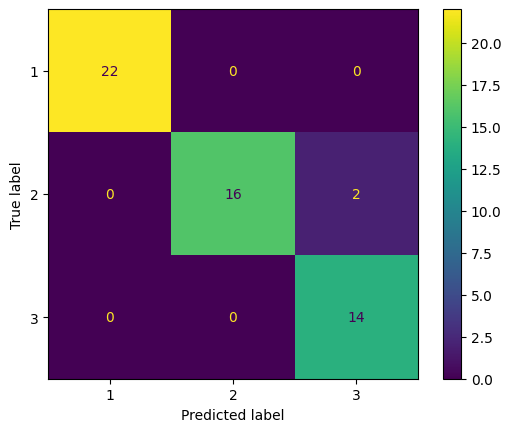

In [13]:
print(confusion_matrix(y_pred, y_test))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

è una matrice con sulle rige e sulle colonne le classi da indentificare.
nelle righe sono riportate le classi reali mentre sulle colonne le classi predette.
se solo la diagonale principale è avvalorata, il modello ha predetto correttamente la classe di goni esempio.

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.89      0.94        18
           3       0.88      1.00      0.93        14

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



I risultati mostrano che l’algoritmo KNN è stato in grado di classificare tutti i record nel dataset di test con una precisione del molto alta, specialmente sulla seconda classe di vini

Precision: è il rapporto tra le osservazioni positive previste correttamente
e le osservazioni positive totali.
"Di tutte le previsioni positive, quante veramente lo sono?"

Recall: è il rapporto tra le osservazioni positive previste correttamente
e tutte le osservazioni nella classe effettiva
"Tra tutte le osservazioni positive, quante sono state predette correttamente?"

F1-score: è la media ponderata di Precision e Recall.
Tiene conto sia dei falsi positivi che dei falsi negativi.
Intuitivamente non è facile da capire quanto l'accuratezza, ma F1 di solito è
più utile dell'accuratezza, soprattutto se si dispone di una distribuzione
delle classi non uniforme. La precisione funziona meglio se falsi positivi
e falsi negativi hanno un costo simile.
Se il costo dei falsi positivi e dei falsi negativi è molto diverso, è meglio
considerare sia Precision che Recall singolarmente.

In [16]:
for i in [1,3,5,7]:
    print("Classifier with k={0}".format(i))
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print("\n")

Classifier with k=1
[[22  0  0]
 [ 0 16  2]
 [ 0  0 14]]
0.9629629629629629


Classifier with k=3
[[22  0  0]
 [ 0 16  2]
 [ 0  0 14]]
0.9629629629629629


Classifier with k=5
[[22  0  0]
 [ 0 17  1]
 [ 0  0 14]]
0.9814814814814815


Classifier with k=7
[[22  0  0]
 [ 1 15  2]
 [ 0  0 14]]
0.9444444444444444


